In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from sklearn.linear_model import LogisticRegression


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers,datasets


In [41]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.cifar10.load_data()
print("the xtrain shape is",xtrain.shape)
print("the ytrain shape is ",ytrain.shape)
print("the xtest shape is ",xtest.shape)
print("the ytest shape is",ytest.shape)

the xtrain shape is (50000, 32, 32, 3)
the ytrain shape is  (50000, 1)
the xtest shape is  (10000, 32, 32, 3)
the ytest shape is (10000, 1)


In [20]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [57]:
#scaling
xtrainscaling=xtrain/255
xtrainscaling

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [35]:
classes=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
classes

['aeroplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

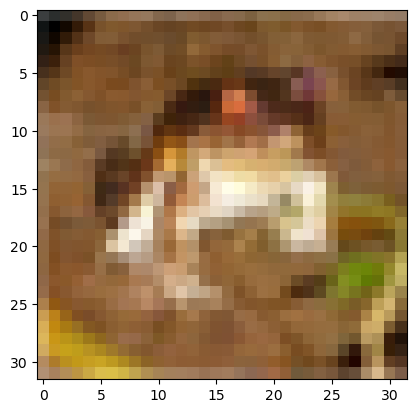

In [43]:
plt.imshow(xtrain[0])


In [55]:
classes[ytrain[0][0]]

'frog'

In [59]:
cnn = keras.Sequential([
    layers.Conv2D(filters=34, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax') ])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


cnn.fit(xtrainscaling, ytrain, epochs=10)

C:\Users\RINNY\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 24ms/step - accuracy: 0.4177 - loss: 1.6208
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.6040 - loss: 1.1255
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6596 - loss: 0.9759
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6970 - loss: 0.8629
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7274 - loss: 0.7870
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7535 - loss: 0.7123
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.7772 - loss: 0.6407
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7979 - loss: 0.5731
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.8205 - loss: 0.5190
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8405 - loss: 0.4606


In [64]:
# accuracy
cnn.evaluate(xtrainscaling,ytrain)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.8481 - loss: 0.4296


[0.4274756908416748, 0.8509600162506104]

In [66]:
prediction=cnn.predict(xtrainscaling)
prediction

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step


array([[1.91948303e-07, 3.14825804e-10, 2.48031644e-03, ...,
        6.63087194e-05, 8.76708484e-09, 1.04633235e-09],
       [2.84207235e-05, 2.47047069e-06, 5.13125769e-07, ...,
        6.73385002e-05, 4.11831458e-09, 9.99881148e-01],
       [4.04164719e-04, 2.83177216e-02, 1.31019938e-03, ...,
        1.07742460e-04, 1.59947611e-02, 8.16409945e-01],
       ...,
       [4.59008297e-04, 2.69295233e-05, 9.32926923e-05, ...,
        5.96614655e-06, 6.31597359e-03, 9.92730081e-01],
       [1.30729734e-06, 9.99826968e-01, 8.04111977e-08, ...,
        4.29230118e-09, 5.95001547e-05, 1.12069945e-04],
       [2.19920347e-03, 8.32262933e-01, 5.10685798e-03, ...,
        1.85441468e-02, 1.52583783e-02, 2.59143446e-04]], dtype=float32)

In [82]:
pred=[np.argmax(p) for p in prediction]
pred

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 5,
 6,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 3,
 4,
 0,
 0,
 9,
 1,
 3,
 2,
 2,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 6,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 6,
 3,
 7,
 3,
 7,
 7,
 1,
 4,
 3,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 2,
 6,
 6,
 1,
 8,
 3,
 2,
 9,
 1,
 8,
 1,
 3,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 5,
 6,
 6,
 1,
 9,
 5,
 2,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 8,
 2,
 8,
 1,
 5,
 5,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 3,
 2,
 3,
 1,
 8,
 7,
 7,
 6,
 0,
 1,
 5,
 1,
 3,
 8,
 2,
 7,
 3,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 9,
 9,
 9,
 6,
 9,
 7,
 8,
 0,
 8,
 8,
 2,
 3,
 2,
 3,
 3,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 3,
 1,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 4,
 6,
 8,
 6,
 8,
 4,
 6,
 3,


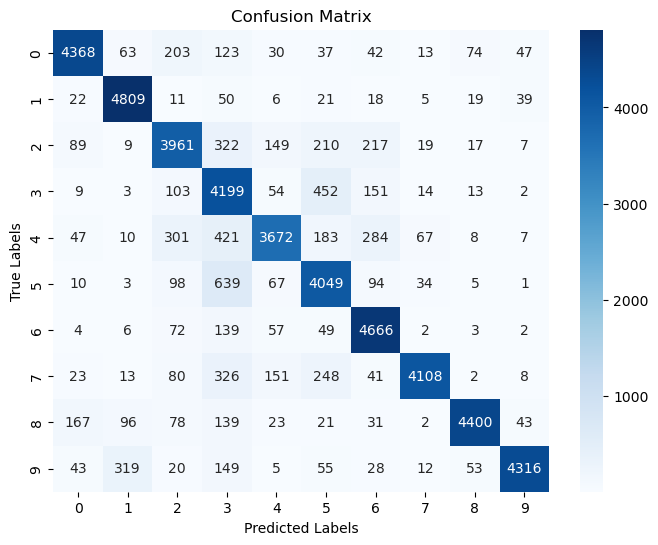

In [100]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
ytest=ytest.flatten()
matrix = confusion_matrix(ytrain, pred)  
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()